In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_excel("Time_Series_Merchants_Transactions_Anonymized.xlsx")


In [ ]:
df.head()

,Merchant Name,Aug 20,Sep 20,Okt 20,Nov 20,Dez 20,Jan 21,Feb 21,Mär 21,Apr 21,...,Dez 21,Jan 22,Feb 22,Mär 22,Apr 22,Mai 22,Jun 22,Jul 22,Aug 22,Sep 22
0,Merchant 1,416772,395324,411329,475679,497747,445429,505033,477349,496073,...,644293,700144,611675,639038,616915,686572,630707,622073,667523,668189
1,Merchant 2,21,24,13,21,4,80,1,24,183,...,11,119,62,52,432,86,108,72,101,80
2,Merchant 3,1,1,0,0,50,3,4,4,0,...,50,0,0,0,0,0,49,1,1,0
3,Merchant 4,159,168,155,152,160,149,147,152,170,...,175,159,180,162,183,172,198,183,226,185
4,Merchant 5,70,27,60,63,80,57,75,73,85,...,132,147,129,127,131,159,150,160,154,168


In [ ]:
df2 = df.set_index('Merchant Name')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Merchant Name  1913 non-null   object
 1   Aug 20         1913 non-null   int64 
 2   Sep 20         1913 non-null   int64 
 3   Okt 20         1913 non-null   int64 
 4   Nov 20         1913 non-null   int64 
 5   Dez 20         1913 non-null   int64 
 6   Jan 21         1913 non-null   int64 
 7   Feb 21         1913 non-null   int64 
 8   Mär 21         1913 non-null   int64 
 9   Apr 21         1913 non-null   int64 
 10  Mai 21         1913 non-null   int64 
 11  Jun 21         1913 non-null   int64 
 12  Jul 21         1913 non-null   int64 
 13  Aug 21         1913 non-null   int64 
 14  Sep 21         1913 non-null   int64 
 15  Okt 21         1913 non-null   int64 
 16  Nov 21         1913 non-null   int64 
 17  Dez 21         1913 non-null   int64 
 18  Jan 22         1913 non-null

In [ ]:
r_seed = 14

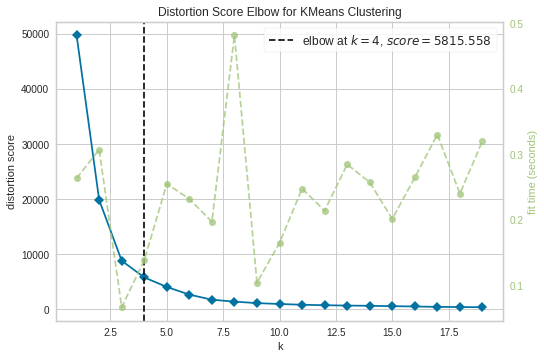

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans


features = list(df2.columns)

X = df2.loc[:,features].values

numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])
numeric_features = list(range(len(features)))

feature_encoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

X = feature_encoder.fit_transform(X)


model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X) 
visualizer.poof() 

For n_clusters = 2 The average silhouette_score is : 0.9857794
For n_clusters = 3 The average silhouette_score is : 0.97849786
For n_clusters = 4 The average silhouette_score is : 0.9704608
For n_clusters = 5 The average silhouette_score is : 0.971154
For n_clusters = 6 The average silhouette_score is : 0.9711707
For n_clusters = 7 The average silhouette_score is : 0.95982003
For n_clusters = 8 The average silhouette_score is : 0.9335337
For n_clusters = 9 The average silhouette_score is : 0.9439029
For n_clusters = 10 The average silhouette_score is : 0.9263009
For n_clusters = 11 The average silhouette_score is : 0.93205684
For n_clusters = 12 The average silhouette_score is : 0.89300424
For n_clusters = 13 The average silhouette_score is : 0.8807822
For n_clusters = 14 The average silhouette_score is : 0.93110347
For n_clusters = 15 The average silhouette_score is : 0.8859923
For n_clusters = 16 The average silhouette_score is : 0.8928374
For n_clusters = 17 The average silhouette_s

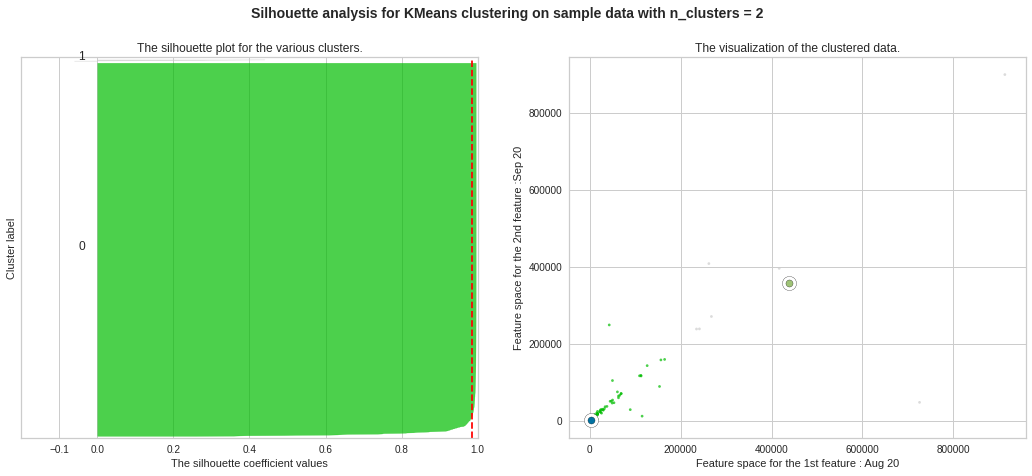

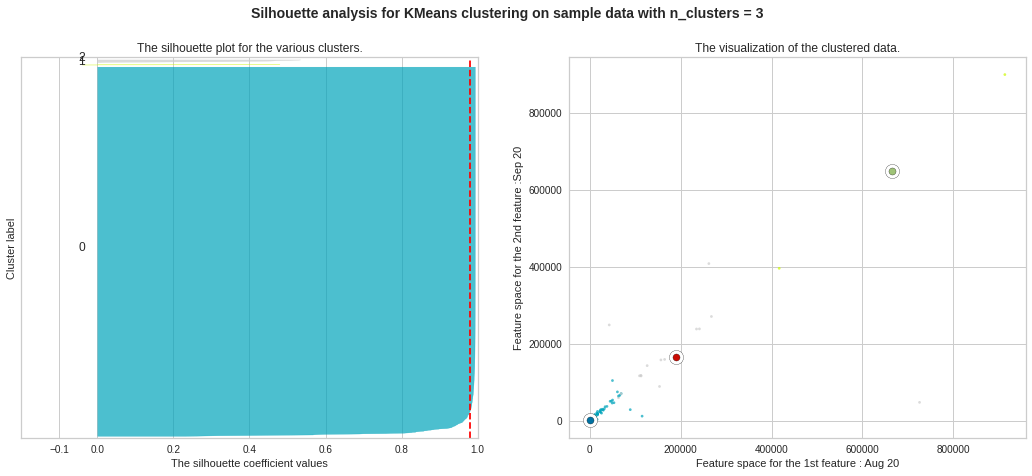

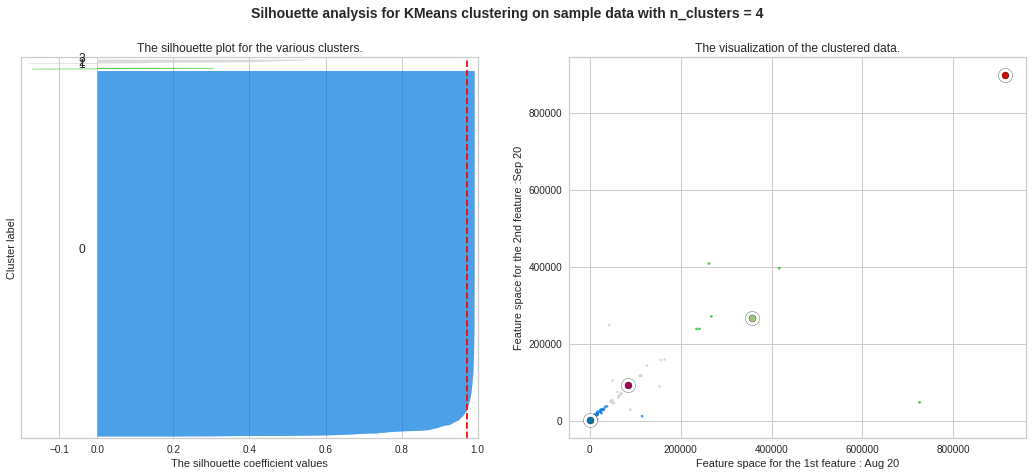

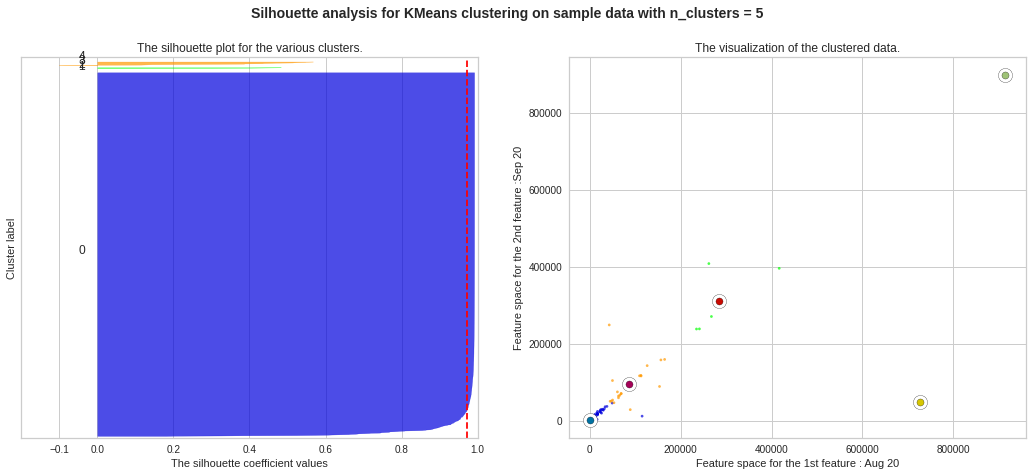

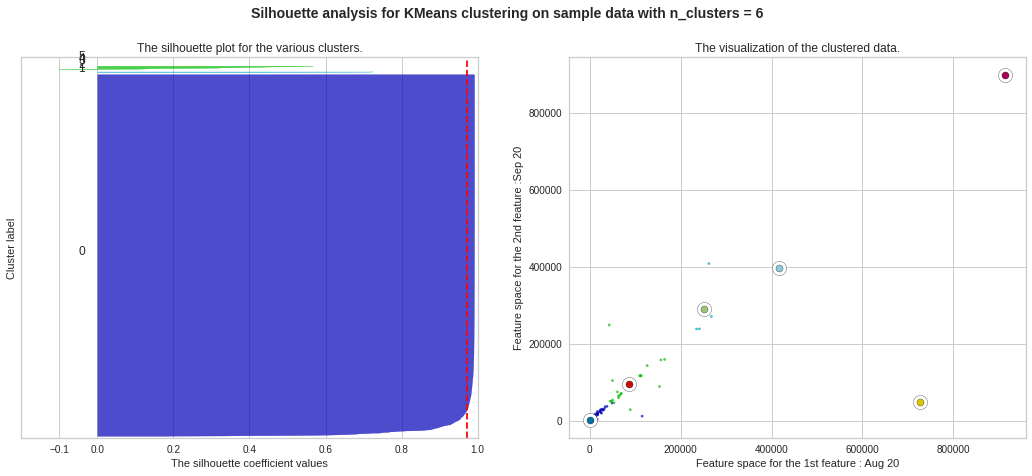

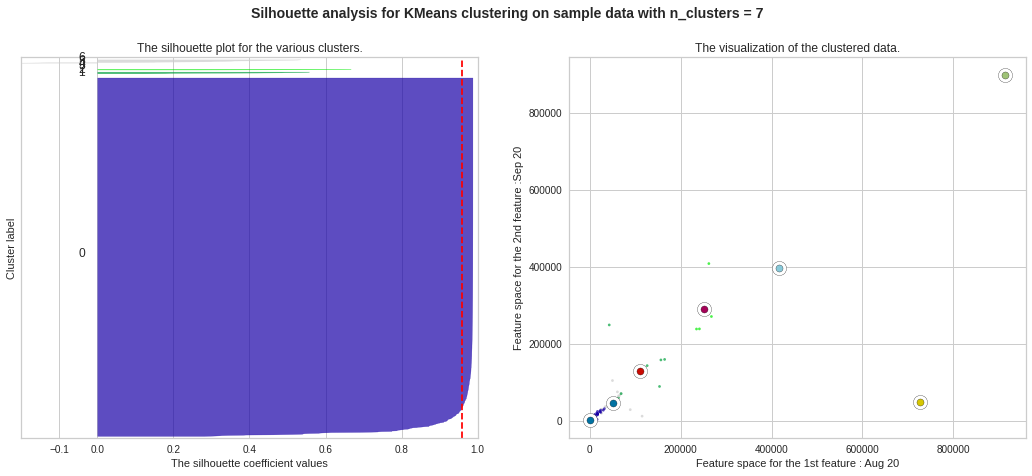

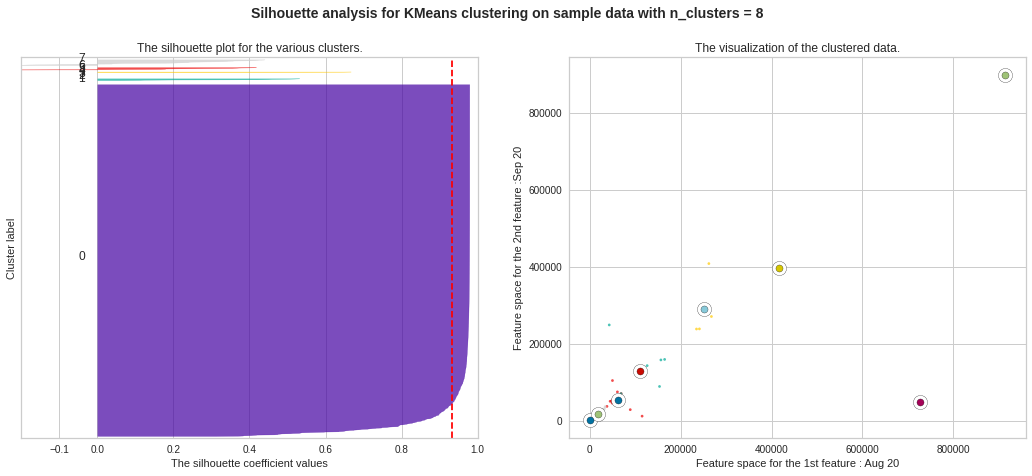

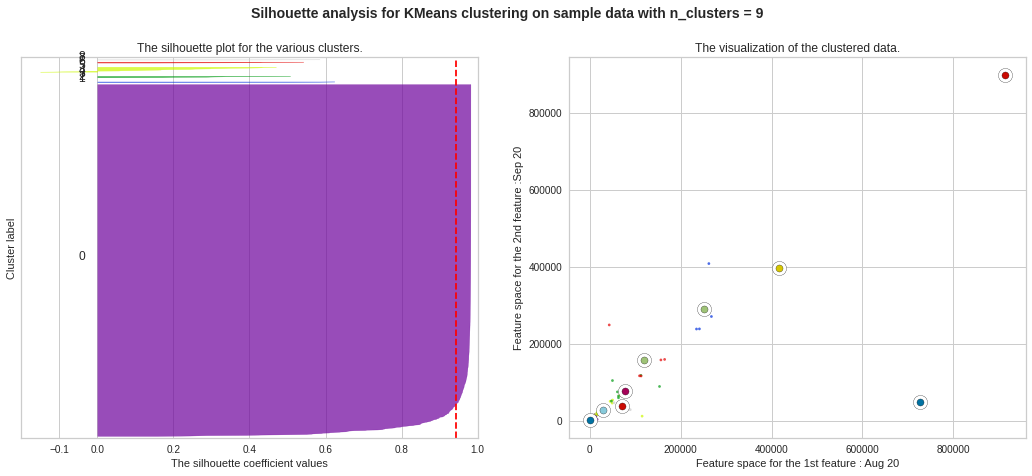

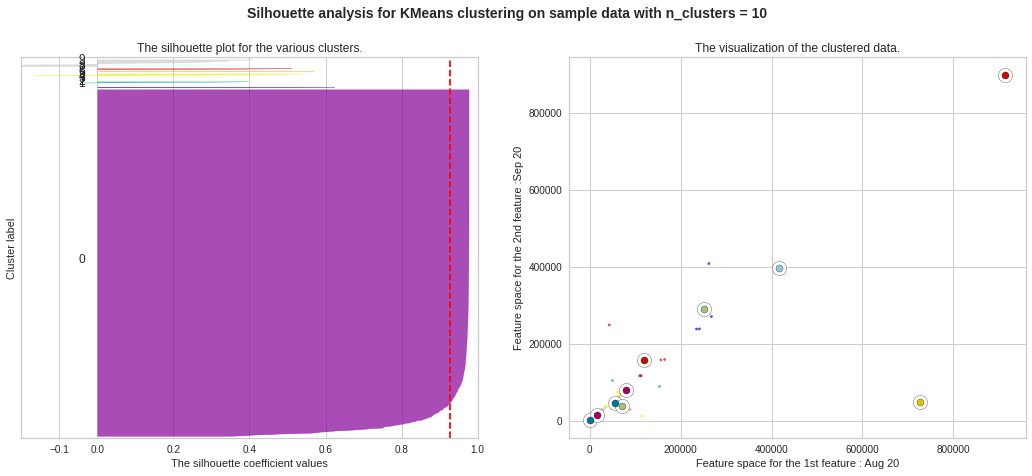

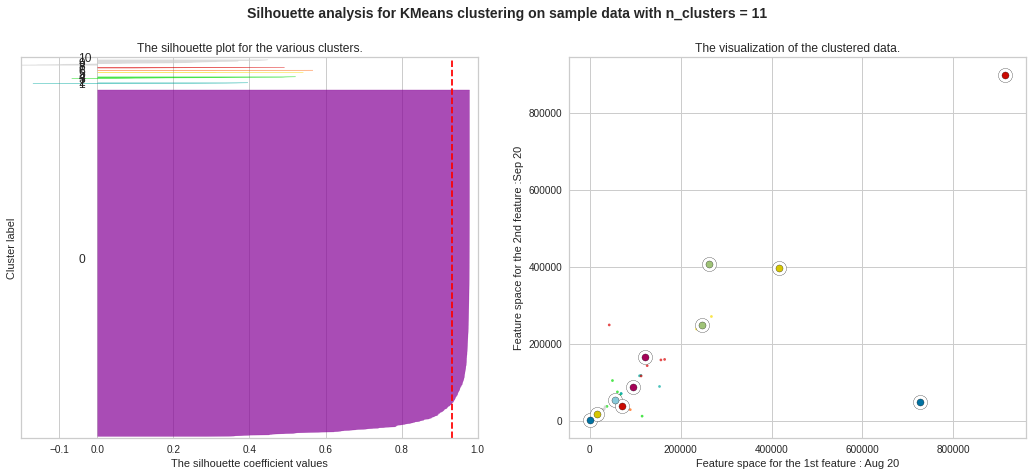

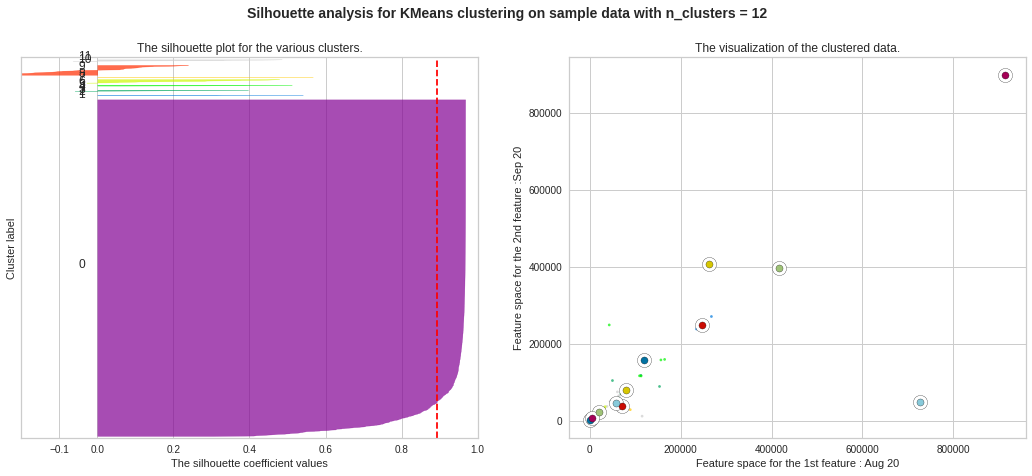

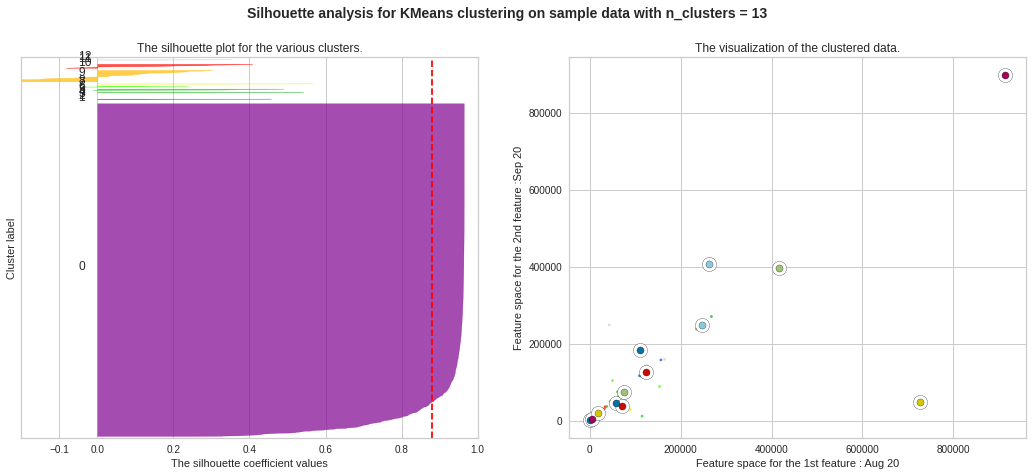

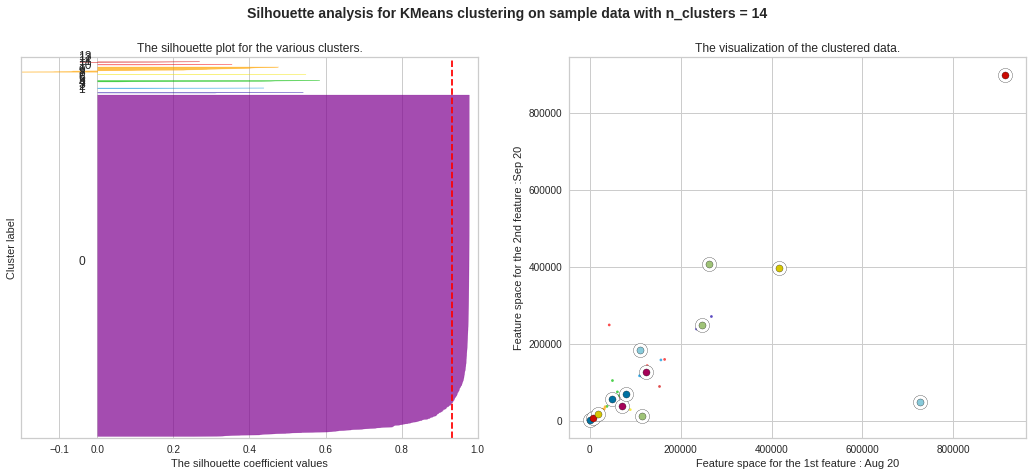

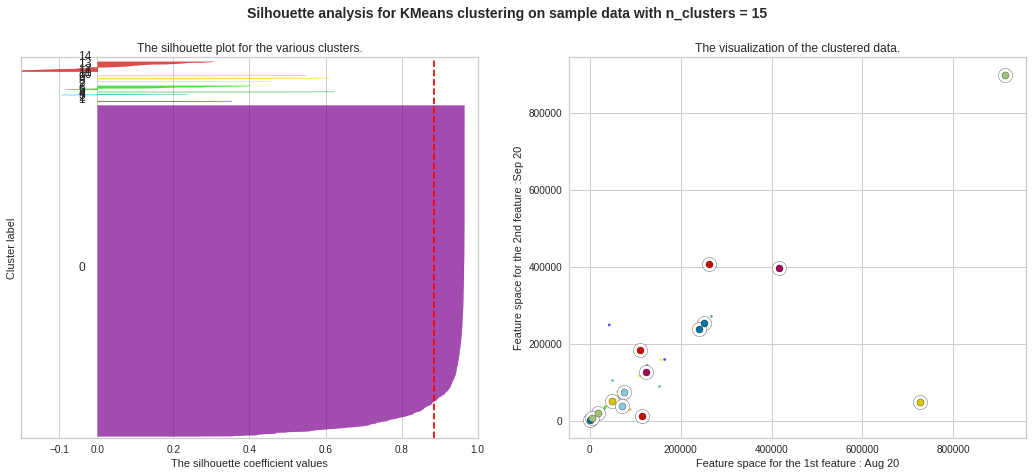

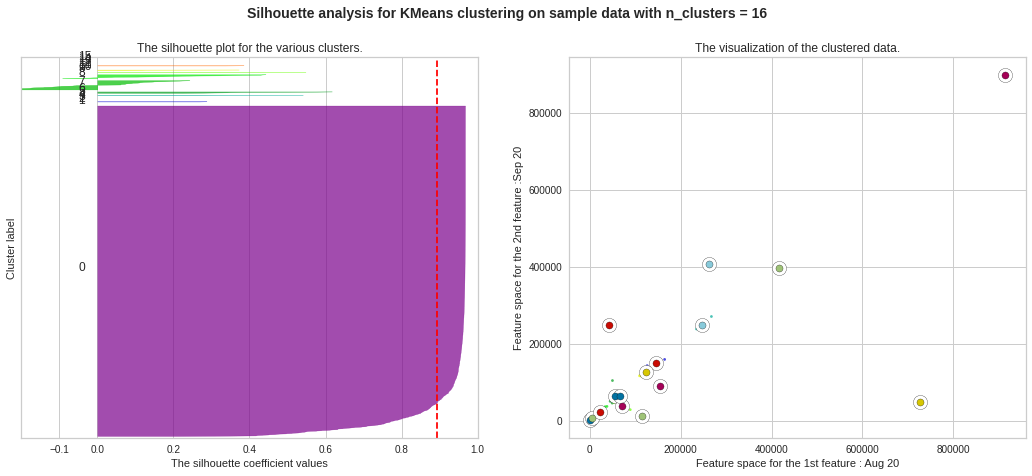

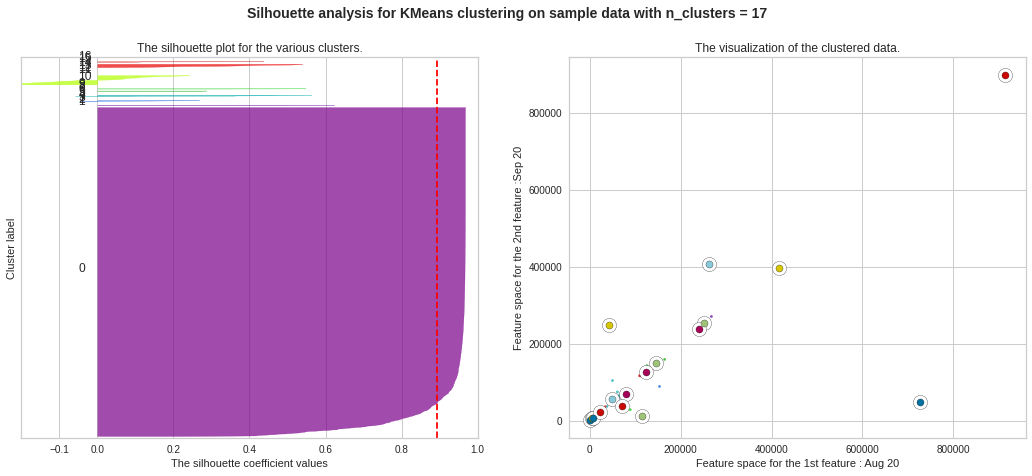

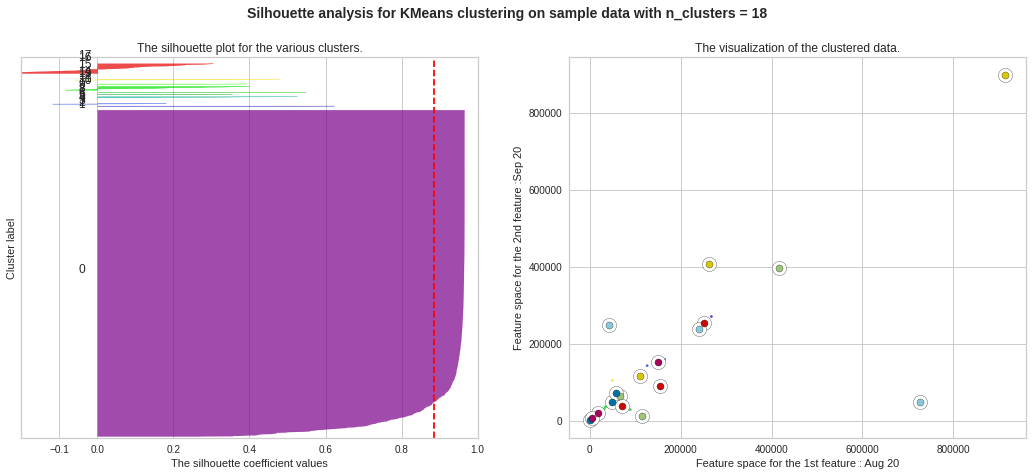

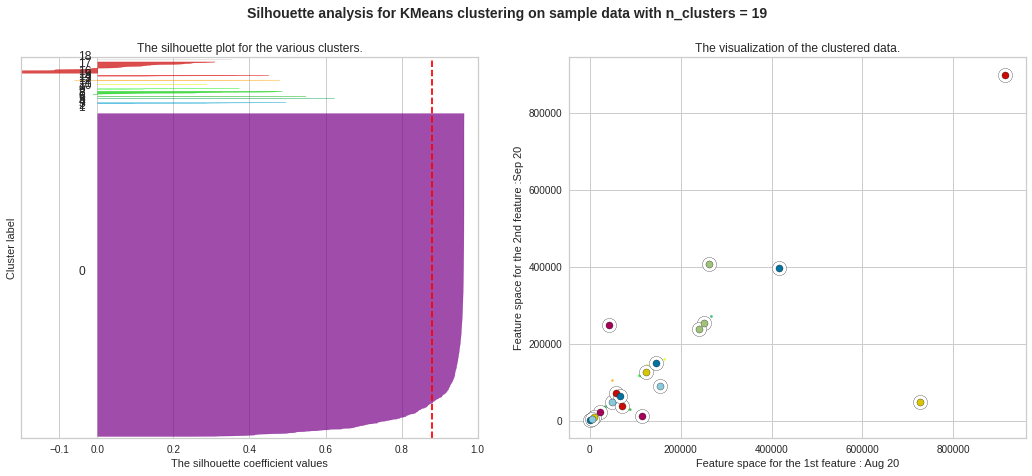

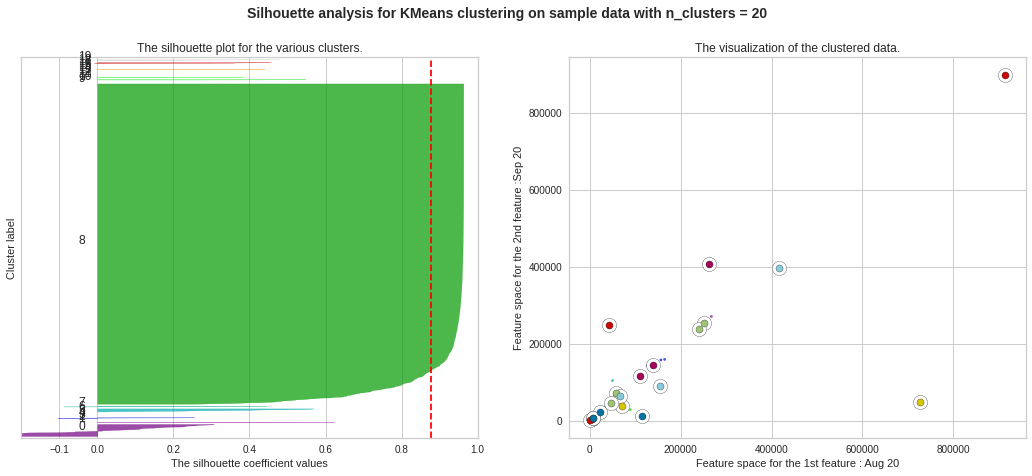

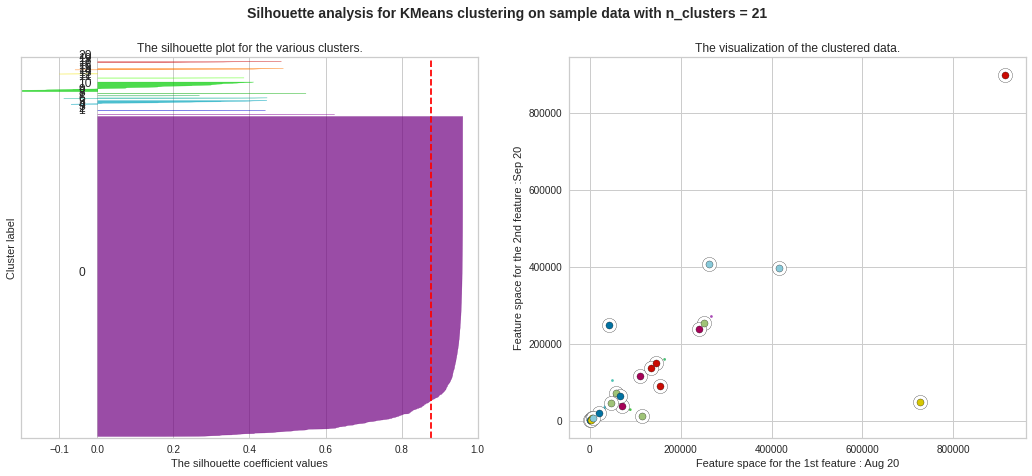

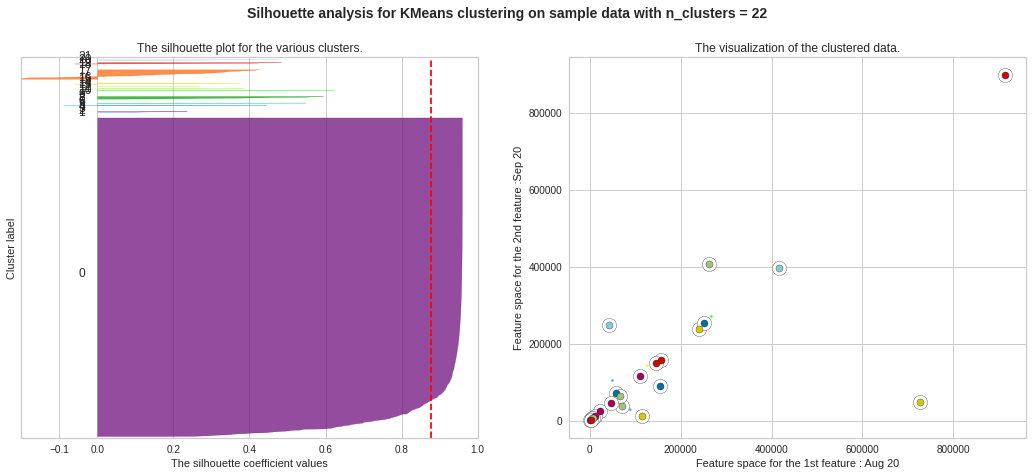

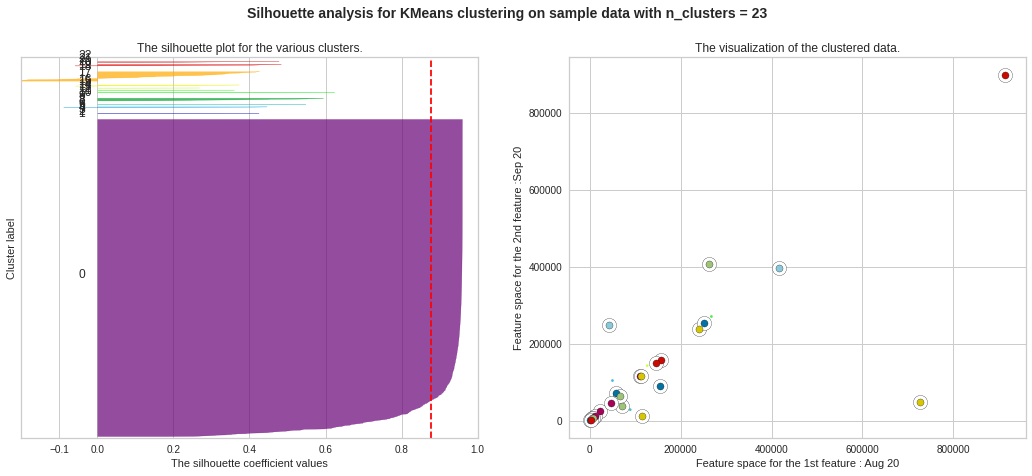

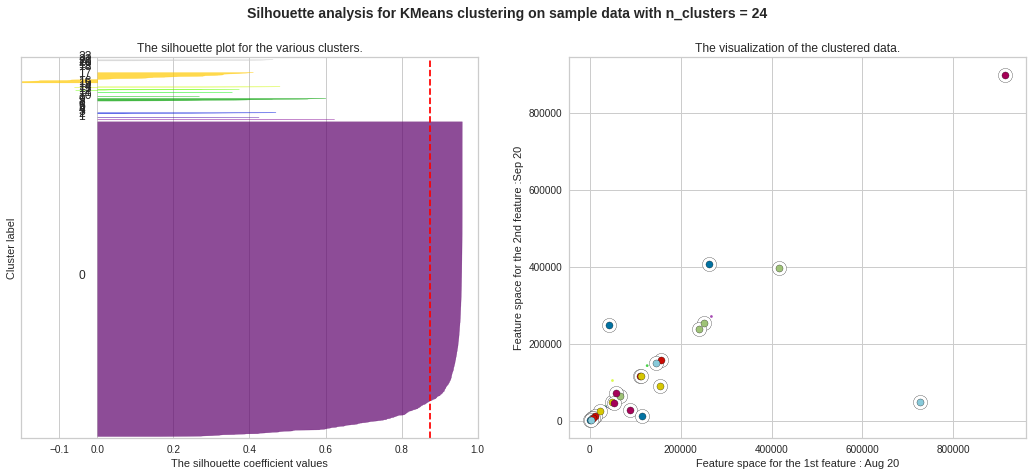

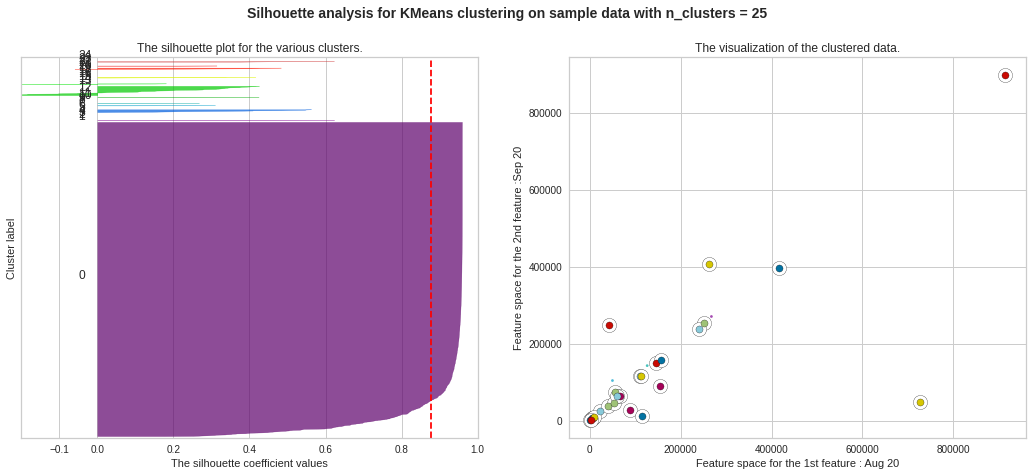

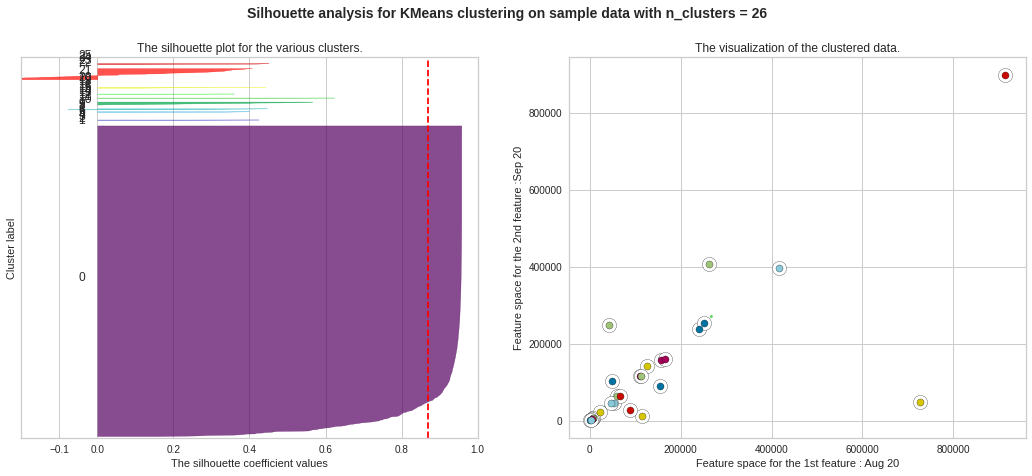

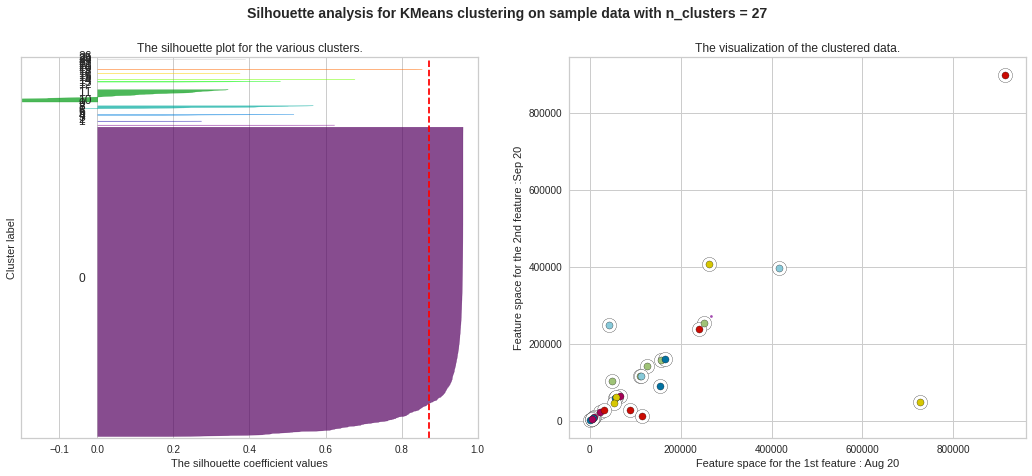

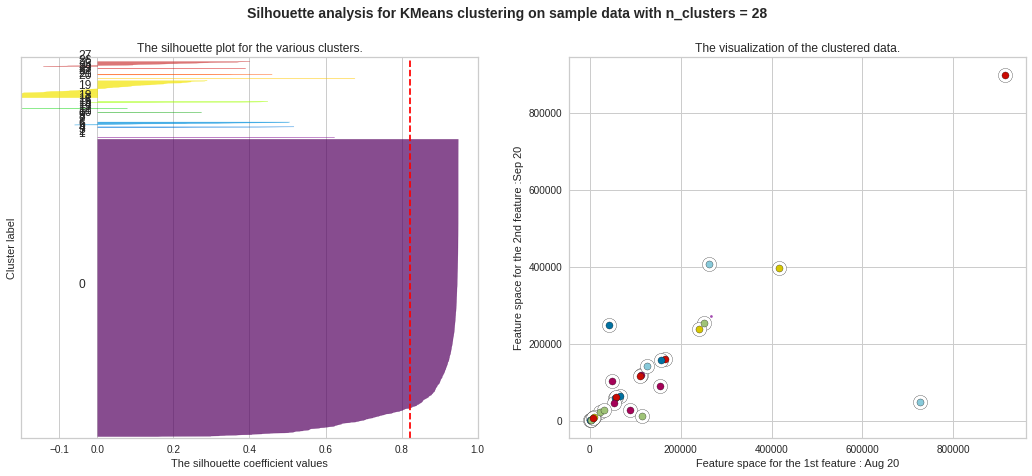

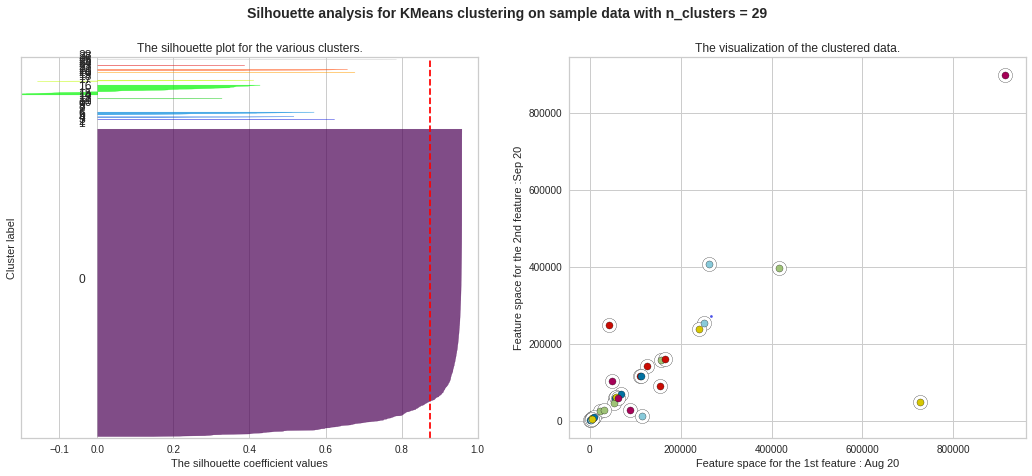

In [ ]:
range_n_clusters = range(2, 30)
X = df2.copy()
X = X.values.astype("float32")
cols = df2.columns

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0),
            ),
        ]
    )
    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k",
    )

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()